## Acquisition Analytics Assignment: Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

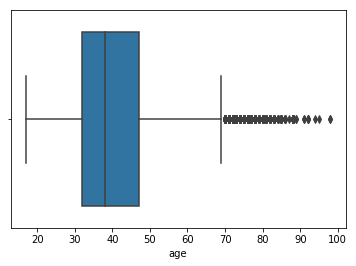

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

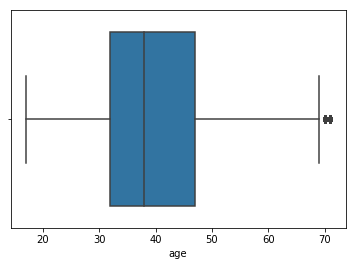

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


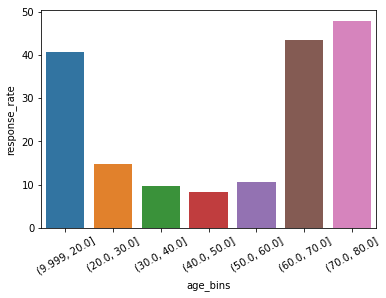

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


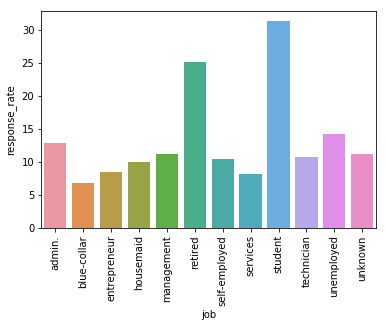

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


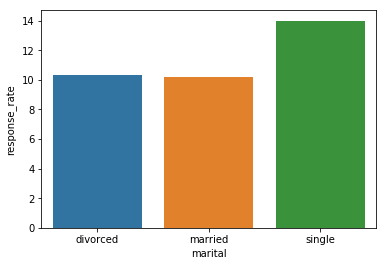

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


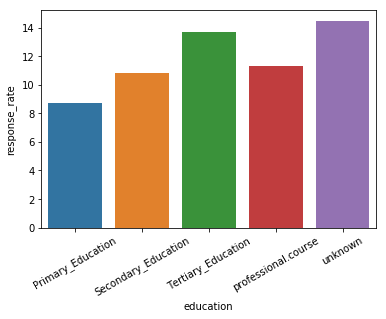

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


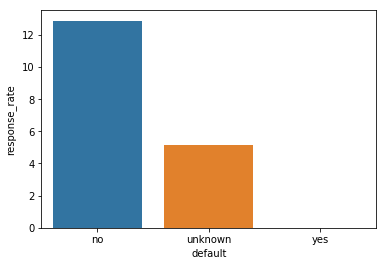

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


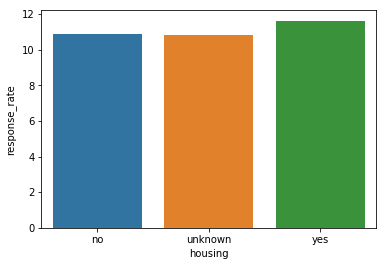

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


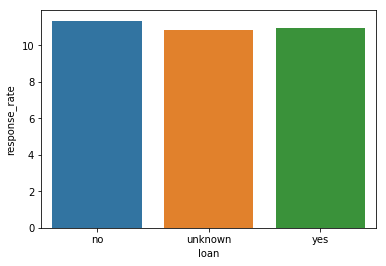

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


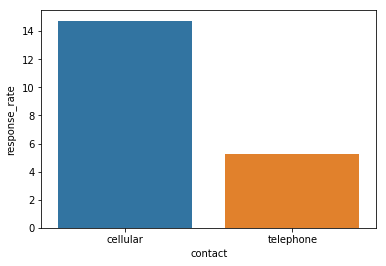

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


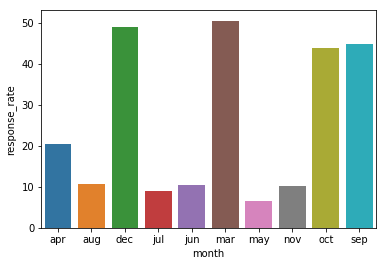

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


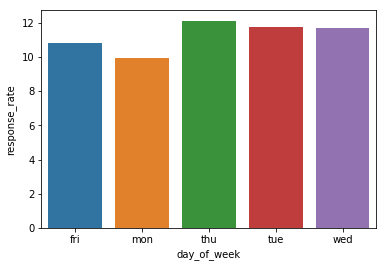

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

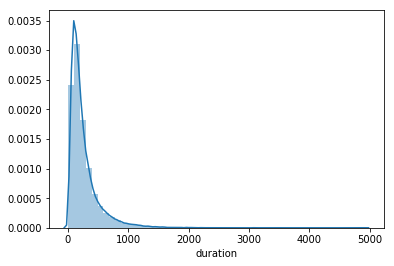

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

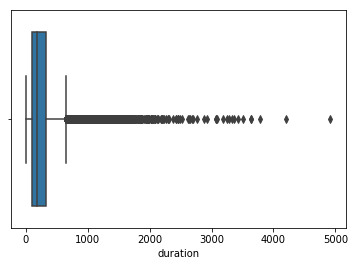

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

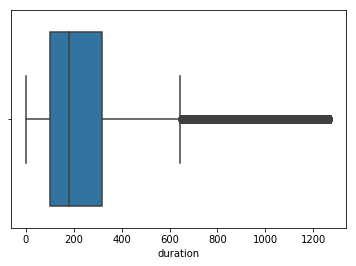

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

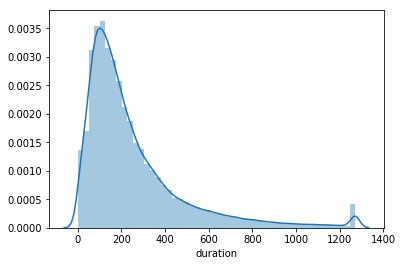

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

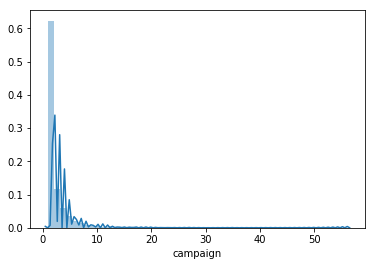

In [96]:
sns.distplot(loan['campaign'])
plt.show()

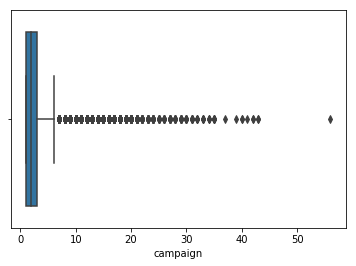

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

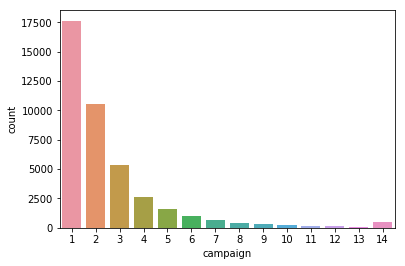

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


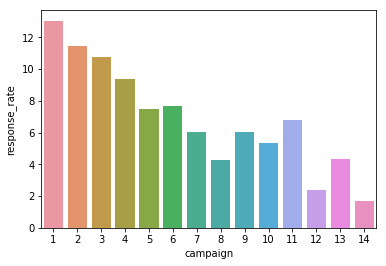

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


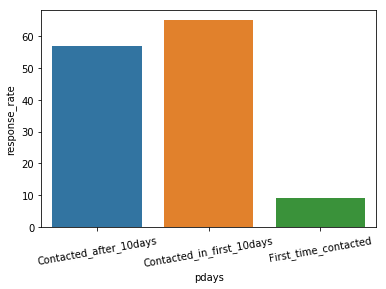

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


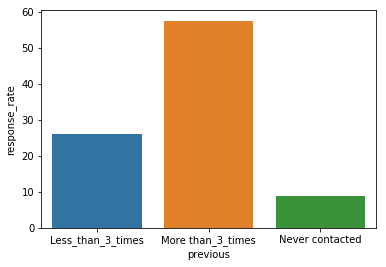

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

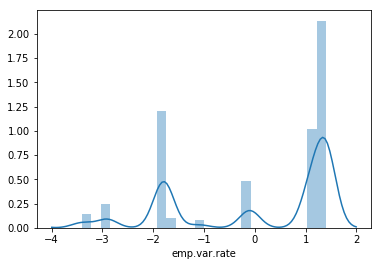

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


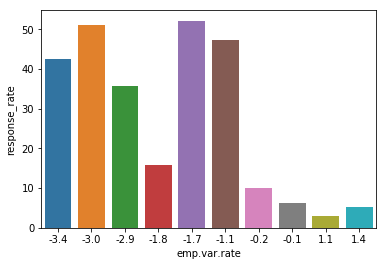

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

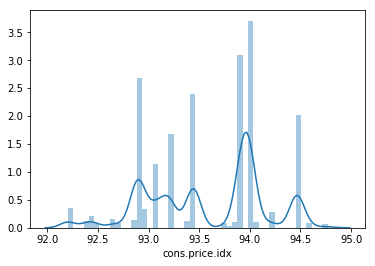

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

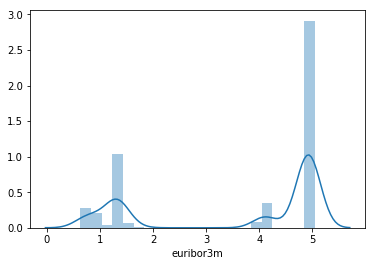

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

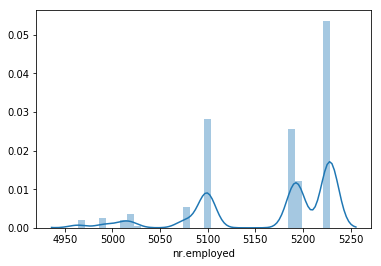

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays',
                     'previous','poutcome'], inplace=True)

In [160]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [161]:
loan.shape

(41188, 52)

In [162]:
# drop duplicate rows
loan=loan.drop_duplicates()

In [163]:
loan.shape

(41173, 52)

In [164]:
# add unique id to each prospect
loan["prospect_id"]=np.arange(1,len(loan)+1)

In [165]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success,prospect_id
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,1
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,2
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,3
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,4
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,5


### Pre modelling steps

In [166]:
loan1=loan

In [167]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [168]:
#as per problem description dropping the column "duration"
duration=loan1['duration']
prospect_id=loan1['prospect_id']
loan1.drop(columns=["duration","prospect_id"],inplace=True)
# Putting feature variable to X
X = loan1.drop(['response'],axis=1)

# Putting response variable to y
y = loan1['response']

In [169]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [170]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
40266,52,1,-1.7,94.215,-40.3,0.893,4991.6,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3810,33,11,1.1,93.994,-36.4,4.859,5191.0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
36282,24,1,-2.9,92.963,-40.8,1.266,5076.2,1,0,0,...,1,0,0,0,1,0,0,0,0,1
13041,49,2,1.4,93.918,-42.7,4.962,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3535,34,6,1.1,93.994,-36.4,4.859,5191.0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [171]:
# Standardisation continuous features for X_train

X_train_df= X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
           'euribor3m','nr.employed']]

In [172]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [173]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
                        'euribor3m','nr.employed'], 1)

In [174]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [175]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40266,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1.185580,-0.653353,-1.140575,1.103257,0.047113,-1.575965,-2.421780
3810,0,0,0,1,0,0,0,0,0,0,...,1,1,0,-0.680838,3.677641,0.647401,0.719814,0.892724,0.712517,0.331423
36282,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.564931,-0.653353,-1.906851,-1.069009,-0.061299,-1.360734,-1.253671
13041,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0.890882,-0.220254,0.838970,0.587951,-0.473264,0.771951,0.843679
3535,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.582606,1.512144,0.647401,0.719814,0.892724,0.712517,0.331423


In [176]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
                    'euribor3m','nr.employed']]

In [177]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [178]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
                      'euribor3m','nr.employed'], 1)

In [179]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [180]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39816,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0.687342,-0.648571,-1.120326,0.833299,0.143180,-1.671321,-2.443182
13837,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-1.082791,-0.648571,0.839070,0.598915,-0.478569,0.775719,0.848442
40354,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.886109,0.227108,-1.120326,0.785396,0.464774,-1.563126,-2.443182
5232,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.867430,-0.210731,0.649451,0.728938,0.872126,0.714716,0.332082
4352,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1.375727,-0.648571,0.649451,0.728938,0.872126,0.714140,0.332082


In [181]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### Feature Selection

In [182]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.887235
1    0.112765
Name: response, dtype: float64

In [183]:
### Feature Selection Using RFE

logreg = LogisticRegression(class_weight='balanced')

In [184]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [185]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False,  True, False])

In [186]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

col = X_train.columns[rfe.support_]

In [187]:
X_train.columns[~rfe.support_]

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'month_jul', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'previous_More than_3_times', 'poutcome_nonexistent', 'age', 'campaign',
       'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [188]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28805
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8081.1
Date:                Mon, 22 Jul 2019   Deviance:                       16162.
Time:                        21:02:05   Pearson chi2:                 2.85e+04
No. Iterations:                    20   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.6718      0.220     -7.610      0.000      -2.102      -1.241
job_student                    0.2540      0.104      2.438      0.015       0.050       0.458
default_yes                  -18.5678   1.68e+04     -0.001      0.999    -3.3e+04     3.3e+04
contact_telephone             -0.6326      0.070     -9.032      0.000      -0.770      -0.495
month_aug                      0.5406      0.077      6.997      0.000       0.389       0.692
month_dec                      0.3030      0.196      1.548      0.122      -0.081       0.687
month_jun                     -0.6344      0.082     -7.695      0.000      -0.796      -0.473
month_mar                      1.3769      0.119     11.581      0.000       1.144       1.610
month_may                     -0.5360      0.063     -8.459      0.000      -0.660      -0.412
month_nov                     -0.6370      0.086     -7.401      0.000      -0.806      -0.468
pdays_First_time_contacted    -0.8327      0.221     -3.764      0.000      -1.266      -0.399
previous_Never contacted       0.4867      0.067      7.262      0.000       0.355       0.618
poutcome_success               1.0314      0.224      4.604      0.000       0.592       1.470
emp.var.rate                  -2.3194      0.150    -15.488      0.000      -2.613      -2.026
cons.price.idx                 0.9515      0.057     16.767      0.000       0.840       1.063
euribor3m                      0.9577      0.125      7.647      0.000       0.712       1.203
==============================================================================================
"""

In [189]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

40266    0.541947
3810     0.034870
36282    0.695854
13041    0.065076
3535     0.034870
8753     0.043860
24889    0.039189
6107     0.034833
25825    0.038508
19899    0.051924
dtype: float64

In [190]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.54194732, 0.03487006, 0.69585401, 0.06507633, 0.03487006,
       0.04385972, 0.03918882, 0.03483288, 0.03850793, 0.05192418])

In [191]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'actual':y_train.values, 'pred_prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,actual,pred_prob
0,1,0.541947
1,0,0.034870
2,0,0.695854
3,0,0.065076
4,0,0.034870


In [192]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.pred_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,actual,pred_prob,predicted
0,1,0.541947,1
1,0,0.034870,0
2,0,0.695854,1
3,0,0.065076,0
4,0,0.034870,0


In [193]:
#from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.predicted )
print(confusion)

[[25212   359]
 [ 2550   700]]


In [194]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.predicted))
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final.actual, y_train_pred_final.predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


0.8990666527878978
Sensitivity: 	0.22
Specificity: 	0.99


In [195]:
#### Checking VIFs

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,emp.var.rate,75.47
14,euribor3m,51.17
9,pdays_First_time_contacted,14.66
10,previous_Never contacted,11.82
13,cons.price.idx,11.23
2,contact_telephone,4.78
7,month_may,3.31
3,month_aug,2.56
5,month_jun,2.30
8,month_nov,1.94


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with 
prediction and unnecessarily making the model complex.

In [196]:
col = col.drop('emp.var.rate', 1)
col

Index(['job_student', 'default_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [197]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28806
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8197.8
Date:                Mon, 22 Jul 2019   Deviance:                       16396.
Time:                        21:02:05   Pearson chi2:                 3.03e+04
No. Iterations:                    20   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5619      0.217     -7.195      0.000      -1.987      -1.136
job_student                    0.3203      0.103      3.113      0.002       0.119       0.522
default_yes                  -18.6789   1.68e+04     -0.001      0.999    -3.3e+04    3.29e+04
contact_telephone             -0.2684      0.063     -4.250      0.000      -0.392      -0.145
month_aug                      0.1018      0.070      1.456      0.145      -0.035       0.239
month_dec                      0.5272      0.194      2.719      0.007       0.147       0.907
month_jun                     -0.0467      0.074     -0.631      0.528      -0.192       0.098
month_mar                      0.8843      0.115      7.658      0.000       0.658       1.111
month_may                     -0.9196      0.058    -15.951      0.000      -1.033      -0.807
month_nov                     -0.1698      0.080     -2.127      0.033      -0.326      -0.013
pdays_First_time_contacted    -1.0243      0.218     -4.693      0.000      -1.452      -0.597
previous_Never contacted       0.4842      0.066      7.384      0.000       0.356       0.613
poutcome_success               0.9423      0.221      4.264      0.000       0.509       1.375
cons.price.idx                 0.1843      0.027      6.931      0.000       0.132       0.236
euribor3m                     -0.9327      0.029    -32.131      0.000      -0.990      -0.876
==============================================================================================
"""

In [198]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,pdays_First_time_contacted,14.39
10,previous_Never contacted,11.81
12,cons.price.idx,3.96
2,contact_telephone,3.82
13,euribor3m,3.57
7,month_may,3.15
5,month_jun,2.07
3,month_aug,2.02
8,month_nov,1.66
11,poutcome_success,1.30


In [199]:
# Let's drop default_yes since its insignificant with high p value
col = col.drop('default_yes')
col

Index(['job_student', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [200]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28807
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8198.0
Date:                Mon, 22 Jul 2019   Deviance:                       16396.
Time:                        21:02:06   Pearson chi2:                 3.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5620      0.217     -7.196      0.000      -1.987      -1.137
job_student                    0.3203      0.103      3.113      0.002       0.119       0.522
contact_telephone             -0.2683      0.063     -4.249      0.000      -0.392      -0.145
month_aug                      0.1015      0.070      1.452      0.147      -0.036       0.239
month_dec                      0.5271      0.194      2.719      0.007       0.147       0.907
month_jun                     -0.0467      0.074     -0.631      0.528      -0.192       0.098
month_mar                      0.8843      0.115      7.658      0.000       0.658       1.111
month_may                     -0.9197      0.058    -15.951      0.000      -1.033      -0.807
month_nov                     -0.1700      0.080     -2.129      0.033      -0.326      -0.013
pdays_First_time_contacted    -1.0245      0.218     -4.694      0.000      -1.452      -0.597
previous_Never contacted       0.4844      0.066      7.387      0.000       0.356       0.613
poutcome_success               0.9423      0.221      4.264      0.000       0.509       1.375
cons.price.idx                 0.1843      0.027      6.931      0.000       0.132       0.236
euribor3m                     -0.9327      0.029    -32.134      0.000      -0.990      -0.876
==============================================================================================
"""

In [201]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,pdays_First_time_contacted,14.39
9,previous_Never contacted,11.81
11,cons.price.idx,3.96
1,contact_telephone,3.82
12,euribor3m,3.57
6,month_may,3.15
4,month_jun,2.07
2,month_aug,2.02
7,month_nov,1.66
10,poutcome_success,1.30


In [202]:
# Let's drop month_jun since it has a high p value
col = col.drop('month_jun')
col

Index(['job_student', 'contact_telephone', 'month_aug', 'month_dec',
       'month_mar', 'month_may', 'month_nov', 'pdays_First_time_contacted',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [203]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28808
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8198.2
Date:                Mon, 22 Jul 2019   Deviance:                       16396.
Time:                        21:02:06   Pearson chi2:                 3.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5685      0.217     -7.234      0.000      -1.993      -1.144
job_student                    0.3206      0.103      3.117      0.002       0.119       0.522
contact_telephone             -0.2812      0.060     -4.696      0.000      -0.399      -0.164
month_aug                      0.1097      0.069      1.595      0.111      -0.025       0.244
month_dec                      0.5364      0.193      2.774      0.006       0.157       0.915
month_mar                      0.8938      0.114      7.807      0.000       0.669       1.118
month_may                     -0.9082      0.055    -16.576      0.000      -1.016      -0.801
month_nov                     -0.1611      0.079     -2.049      0.041      -0.315      -0.007
pdays_First_time_contacted    -1.0259      0.218     -4.702      0.000      -1.454      -0.598
previous_Never contacted       0.4839      0.066      7.381      0.000       0.355       0.612
poutcome_success               0.9394      0.221      4.253      0.000       0.506       1.372
cons.price.idx                 0.1827      0.026      6.899      0.000       0.131       0.235
euribor3m                     -0.9320      0.029    -32.094      0.000      -0.989      -0.875
==============================================================================================
"""

In [204]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,pdays_First_time_contacted,13.91
8,previous_Never contacted,11.81
10,cons.price.idx,3.75
11,euribor3m,3.32
1,contact_telephone,3.24
5,month_may,2.42
2,month_aug,2.00
6,month_nov,1.64
9,poutcome_success,1.30
4,month_mar,1.07


In [205]:
# Let's drop pdays_First_time_contacted since it has a high VIF
col = col.drop('pdays_First_time_contacted')
col

Index(['job_student', 'contact_telephone', 'month_aug', 'month_dec',
       'month_mar', 'month_may', 'month_nov', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [206]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28809
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8208.7
Date:                Mon, 22 Jul 2019   Deviance:                       16417.
Time:                        21:02:07   Pearson chi2:                 3.04e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5403      0.069    -36.817      0.000      -2.676      -2.405
job_student                  0.3446      0.102      3.366      0.001       0.144       0.545
contact_telephone           -0.2828      0.060     -4.722      0.000      -0.400      -0.165
month_aug                    0.1266      0.069      1.846      0.065      -0.008       0.261
month_dec                    0.5344      0.193      2.769      0.006       0.156       0.913
month_mar                    0.8972      0.114      7.845      0.000       0.673       1.121
month_may                   -0.9115      0.055    -16.641      0.000      -1.019      -0.804
month_nov                   -0.1443      0.078     -1.839      0.066      -0.298       0.009
previous_Never contacted     0.4251      0.063      6.695      0.000       0.301       0.550
poutcome_success             1.8952      0.090     21.118      0.000       1.719       2.071
cons.price.idx               0.1938      0.026      7.356      0.000       0.142       0.245
euribor3m                   -0.9425      0.029    -32.600      0.000      -0.999      -0.886
============================================================================================
"""

In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.predicted)

0.8990666527878978

In [208]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cons.price.idx,3.70
1,contact_telephone,3.19
10,euribor3m,2.91
7,previous_Never contacted,2.88
5,month_may,2.26
2,month_aug,1.83
6,month_nov,1.45
8,poutcome_success,1.23
4,month_mar,1.07
0,job_student,1.05


In [209]:
# Let's drop month_nov since it is insignificant
col = col.drop('month_nov')
col

Index(['job_student', 'contact_telephone', 'month_aug', 'month_dec',
       'month_mar', 'month_may', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [210]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28810
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8210.4
Date:                Mon, 22 Jul 2019   Deviance:                       16421.
Time:                        21:02:07   Pearson chi2:                 3.04e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5801      0.066    -39.338      0.000      -2.709      -2.452
job_student                  0.3441      0.103      3.357      0.001       0.143       0.545
contact_telephone           -0.2755      0.060     -4.606      0.000      -0.393      -0.158
month_aug                    0.1641      0.066      2.501      0.012       0.036       0.293
month_dec                    0.5625      0.192      2.925      0.003       0.186       0.939
month_mar                    0.9189      0.114      8.072      0.000       0.696       1.142
month_may                   -0.8862      0.053    -16.689      0.000      -0.990      -0.782
previous_Never contacted     0.4362      0.063      6.907      0.000       0.312       0.560
poutcome_success             1.8907      0.090     21.083      0.000       1.715       2.066
cons.price.idx               0.2059      0.025      8.088      0.000       0.156       0.256
euribor3m                   -0.9566      0.028    -34.399      0.000      -1.011      -0.902
============================================================================================
"""

In [211]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,contact_telephone,3.17
8,cons.price.idx,2.99
9,euribor3m,2.65
6,previous_Never contacted,2.48
5,month_may,2.09
2,month_aug,1.59
7,poutcome_success,1.18
4,month_mar,1.06
0,job_student,1.05
3,month_dec,1.04


All variables have a good value of VIF. So we need not drop any more variables 
and we can proceed with making predictions using this model only

### the features that are most significant are:
- contact_telephone	
- cons.price.idx	
- euribor3m
- previous_Never contacted
- month_may
- month_aug
- poutcome_success
- month_mar
- job_student
- month_dec

In [212]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'actual':y_train.values, 'pred_prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.pred_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

#from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.predicted))
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final.actual, y_train_pred_final.predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


[[25272   299]
 [ 2623   627]]
0.8986155927969189
Sensitivity: 	0.19
Specificity: 	0.99


We notice that the model gives a very low sensitivity and high specificity, which is not preferred.
i.e our true postive rate is very low and true negative rate is high, thus our model wont be able to identify the responders correctly

In [213]:
X_test_nw = X_test[col]
X_test_nw.head()

,job_student,contact_telephone,month_aug,month_dec,month_mar,month_may,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
39816,0,1,0,0,0,0,1,0,0.833299,-1.671321
13837,0,0,0,0,0,0,1,0,0.598915,0.775719
40354,0,0,1,0,0,0,1,0,0.785396,-1.563126
5232,0,1,0,0,0,1,1,0,0.728938,0.714716
4352,0,1,0,0,0,1,1,0,0.728938,0.714140


In [214]:
X_test_sm = sm.add_constant(X_test_nw)

#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

39816    0.343228
13837    0.059377
40354    0.420008
5232     0.021057
4352     0.021069
38965    0.326303
27154    0.076069
1131     0.021069
22916    0.059154
14765    0.059561
dtype: float64

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
39816,0.343228
13837,0.059377
40354,0.420008
5232,0.021057
4352,0.021069


In [216]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
#y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_test_df.head()

,response
0,1
1,0
2,0
3,0
4,0


In [217]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,response,0
0,1,0.343228
1,0,0.059377
2,0,0.420008
3,0,0.021057
4,0,0.021069


In [218]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'pred_prob'})
y_pred_final= y_pred_final.rename(columns={ 'response' : 'actual'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['actual','pred_prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,actual,pred_prob
0,1,0.343228
1,0,0.059377
2,0,0.420008
3,0,0.021057
4,0,0.021069


In [219]:
y_pred_final['predicted'] = y_pred_final.pred_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.actual, y_pred_final.predicted)

confusion2 = metrics.confusion_matrix(y_pred_final.actual, y_pred_final.predicted )
confusion2


array([[10854,   109],
       [ 1112,   277]])

In [220]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.actual, y_pred_final.predicted))
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_pred_final.actual, y_pred_final.predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


0.9011496113989638
Sensitivity: 	0.2
Specificity: 	0.99


After testing on the test set too we receive poor TPR or sensitivity.
We will perform pca for feature selection and perform the regression thereafter.

### Modelling

- Logistic Regression + pca

#### Logistic Regression

In [221]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [222]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [223]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28821
Model:                            GLM   Df Residuals:                    28772
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8010.8
Date:                Mon, 22 Jul 2019   Deviance:                       16022.
Time:                        21:02:09   Pearson chi2:                 2.93e+04
No. Iterations:                    20   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.7993      0.284     -6.335      0.000      -2.356      -1.243
job_blue-collar                    -0.1674      0.082     -2.039      0.041      -0.328      -0.006
job_entrepreneur                   -0.0960      0.128     -0.751      0.452      -0.346       0.154
job_housemaid                      -0.0653      0.150     -0.435      0.663      -0.359       0.229
job_management                     -0.1256      0.091     -1.383      0.167      -0.304       0.052
job_retired                         0.2431      0.110      2.202      0.028       0.027       0.459
job_self-employed                  -0.0418      0.117     -0.357      0.721      -0.272       0.188
job_services                       -0.1609      0.090     -1.792      0.073      -0.337       0.015
job_student                         0.2105      0.119      1.774      0.076      -0.022       0.443
job_technician                     -0.0135      0.074     -0.183      0.855      -0.159       0.132
job_unemployed                      0.0418      0.131      0.319      0.750      -0.215       0.299
job_unknown                        -0.1539      0.262     -0.586      0.558      -0.668       0.360
marital_married                     0.0488      0.072      0.681      0.496      -0.092       0.189
marital_single                      0.0898      0.082      1.099      0.272      -0.070       0.250
education_Secondary_Education       0.0615      0.072      0.853      0.394      -0.080       0.203
education_Tertiary_Education        0.1446      0.073      1.989      0.047       0.002       0.287
education_professional.course       0.0643      0.085      0.754      0.451      -0.103       0.231
education_unknown                   0.1627      0.111      1.467      0.142      -0.055       0.380
default_unknown                    -0.2995      0.069     -4.330      0.000      -0.435      -0.164
default_yes                       -18.7007   1.68e+04     -0.001      0.999    -3.3e+04     3.3e+04
housing_unknown                    -0.0597      0.073     -0.822      0.411      -0.202       0.083
housing_yes                        -0.0339      0.043     -0.790      0.430      -0.118       0.050
loan_unknown                       -0.0597      0.073     -0.822      0.411      -0.202       0.083
loan_yes                           -0.0454      0.060     -0.762      0.446      -0.162       0.071
contact_telephone                  -0.6852      0.079     -8.626      0.000      -0.841      -0.530
month_aug                           0.4004      0.129      3.116      0.002       0.149       0.652
month_dec                           0.3242      0.223      1.454      0.146      -0.113       0.761
month_jul                           0.1257      0.099      1.269      0.204      -0.068       0.320
month_jun                          -0.5899      0.132     -4.4

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#### Principal Component Analysis

In [225]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [226]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.71
1      43.46
2      52.35
3      60.52
4      66.34
5      69.65
6      72.23
7      74.58
8      76.79
9      78.74
10     80.63
11     82.47
12     84.28
13     86.05
14     87.70
15     89.19
16     90.45
17     91.60
18     92.65
19     93.40
20     94.10
21     94.68
22     95.20
23     95.71
24     96.17
25     96.57
26     96.97
27     97.36
28     97.70
29     98.01
30     98.31
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


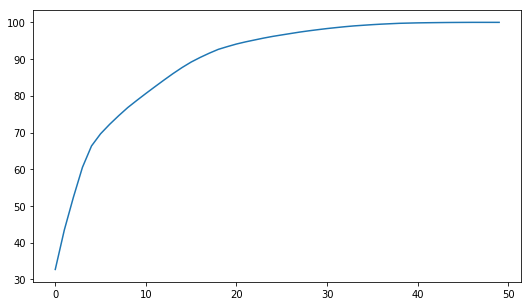

In [227]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [228]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [229]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8156205544568197

In [230]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

In [231]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9240 1723]
 [ 503  886]]
Sensitivity: 	0.64
Specificity: 	0.84
AUC:    	 0.79


In [232]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.887235
1    0.112765
Name: response, dtype: float64

In [233]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [234]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pca__n_components': [16, 17, 18, 19, 20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [235]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7814720081786906
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l1', 'pca__n_components': 16}


In [236]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9240 1723]
 [ 503  886]]
Sensitivity: 	0.64
Specificity: 	0.84
AUC:    	 0.79


In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10963
           1       0.34      0.64      0.44      1389

   micro avg       0.82      0.82      0.82     12352
   macro avg       0.64      0.74      0.67     12352
weighted avg       0.88      0.82      0.84     12352



In [238]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [239]:
pred_prob.head()

,pred_prob
0,0.848758
1,0.373410
2,0.913997
3,0.230920
4,0.184259


In [240]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [241]:
decile_df.head()

,0,1,2
0,39816,1,0.848758
1,13837,0,0.373410
2,40354,0,0.913997
3,5232,0,0.230920
4,4352,0,0.184259


In [242]:
decile_df.drop(0, inplace=True, axis = 1)

In [243]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [244]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [245]:
decile_df.head()

,actual,pred_prob,predicted
0,1,0.848758,1
1,0,0.373410,0
2,0,0.913997,1
3,0,0.230920,0
4,0,0.184259,0


In [246]:
###  Finding Optimal Cutoff Point

#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
   decile_df[i]= decile_df.pred_prob.map(lambda x: 1 if x > i else 0)
decile_df.head()

,actual,pred_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.848758,1,1,1,1,1,1,1,1,1,1,0
1,0,0.373410,0,1,1,1,1,0,0,0,0,0,0
2,0,0.913997,1,1,1,1,1,1,1,1,1,1,1
3,0,0.230920,0,1,1,1,0,0,0,0,0,0,0
4,0,0.184259,0,1,1,0,0,0,0,0,0,0,0


In [247]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(decile_df.actual, decile_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.112451  1.000000  0.000000
0.1   0.1  0.112532  1.000000  0.000091
0.2   0.2  0.222879  0.970482  0.128158
0.3   0.3  0.443005  0.882649  0.387303
0.4   0.4  0.706363  0.735061  0.702727
0.5   0.5  0.819786  0.637869  0.842835
0.6   0.6  0.848769  0.596832  0.880690
0.7   0.7  0.877186  0.501080  0.924838
0.8   0.8  0.885848  0.385889  0.949193
0.9   0.9  0.897911  0.164147  0.990878


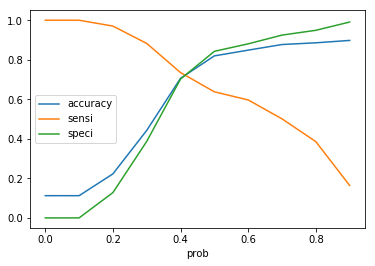

In [248]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [249]:
decile_df_final = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [250]:
decile_df_final.head()

,0,1,2
0,39816,1,0.848758
1,13837,0,0.373410
2,40354,0,0.913997
3,5232,0,0.230920
4,4352,0,0.184259


In [251]:
decile_df_final.drop(0, inplace=True, axis = 1)

In [252]:
decile_df_final.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

decile_df_final['predicted'] = decile_df_final.pred_prob.map( lambda x: 1 if x > 0.4 else 0)

decile_df_final.head()

,actual,pred_prob,predicted
0,1,0.848758,1
1,0,0.373410,0
2,0,0.913997,1
3,0,0.230920,0
4,0,0.184259,0


In [253]:
# create confusion matrix
cm = confusion_matrix(decile_df_final['actual'],decile_df_final['predicted'])
print(cm)

[[7704 3259]
 [ 368 1021]]


In [254]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(decile_df_final['actual'],decile_df_final['predicted'], 
                                                              average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.74
Specificity: 	0.7


In [255]:
decile_df_final.shape

(12352, 3)

#### 3.Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

While creating the data frame, list the cost of call for each prospect in a new column

As per the assignment, set the business objective to achieving 80% of total responders at the minimum possible cost. The total number of responders is the total number of prospects who responded, from the available data of about 45,000 prospects.

Therefore we now consider the entire dataset and proceed further with the next steps


In [256]:
X.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,1,0,0,0,0,1,0,1,1,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [257]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [258]:
print(X.shape)
print(y.shape)

(41173, 50)
(41173,)


#### Standardization

In [259]:
# Standardisation continuous features for X

X_df= X[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
           'euribor3m','nr.employed']]

In [260]:
std_X_df=(X_df-X_df.mean())/X_df.std()

In [261]:
X = X.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx',
                        'euribor3m','nr.employed'], 1)

In [262]:
X = pd.concat([X,std_X_df],axis=1)

In [263]:
X.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1.576690,-0.65192,0.648016,0.722543,0.886484,0.712377,0.331621
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.674955,-0.65192,0.648016,0.722543,0.886484,0.712377,0.331621
2,0,0,0,0,0,0,1,0,0,0,...,1,1,0,-0.290355,-0.65192,0.648016,0.722543,0.886484,0.712377,0.331621
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0.004442,-0.65192,0.648016,0.722543,0.886484,0.712377,0.331621
4,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.576690,-0.65192,0.648016,0.722543,0.886484,0.712377,0.331621


In [264]:
# predict churn on test data
y_pred = model.predict(X)

In [265]:
# create confusion matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[30732  5802]
 [ 1734  2905]]


In [266]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.63
Specificity: 	0.84


In [267]:
# check area under curve
y_pred_prob = model.predict_proba(X)[:, 1]
print("AUC:    \t", round(roc_auc_score(y, y_pred_prob),2))

AUC:    	 0.79


In [268]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     36534
           1       0.33      0.63      0.44      4639

   micro avg       0.82      0.82      0.82     41173
   macro avg       0.64      0.73      0.66     41173
weighted avg       0.88      0.82      0.84     41173



In [269]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])
pred_prob.head()

,pred_prob
0,0.193433
1,0.166432
2,0.179122
3,0.188982
4,0.187349


In [270]:
decile_df = pd.concat([pd.DataFrame(y).reset_index(), pred_prob], ignore_index=True,axis=1)

decile_df.head()

,0,1,2
0,0,0,0.193433
1,1,0,0.166432
2,2,0,0.179122
3,3,0,0.188982
4,4,0,0.187349


In [271]:
decile_df.drop(0, inplace=True, axis = 1)

decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.4 else 0)

decile_df.head()

,actual,pred_prob,predicted
0,0,0.193433,0
1,0,0.166432,0
2,0,0.179122,0
3,0,0.188982,0
4,0,0.187349,0


In [272]:
# create confusion matrix
cm = confusion_matrix(decile_df['actual'],decile_df['predicted'])
print(cm)

[[25725 10809]
 [ 1268  3371]]


In [273]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(decile_df['actual'],decile_df['predicted'], 
                                                              average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.73
Specificity: 	0.7


In [274]:
decile_df.shape

(41173, 3)

In [275]:
duration.reset_index(drop=True, inplace=True)
prospect_id.reset_index(drop=True, inplace=True)

In [276]:
decile_df_final = pd.concat([decile_df,prospect_id],axis=1)

In [277]:
decile_df_final = pd.concat([decile_df_final,duration],axis=1)

In [278]:
decile_df_final.head()

,actual,pred_prob,predicted,prospect_id,duration
0,0,0.193433,0,1,261
1,0,0.166432,0,2,149
2,0,0.179122,0,3,226
3,0,0.188982,0,4,151
4,0,0.187349,0,5,307


In [279]:
#assuming cost of call = $1 per 60 secs
decile_df_final['call_cost']=round(decile_df_final['duration']/60,2)

In [280]:
decile_df_final.head()

,actual,pred_prob,predicted,prospect_id,duration,call_cost
0,0,0.193433,0,1,261,4.35
1,0,0.166432,0,2,149,2.48
2,0,0.179122,0,3,226,3.77
3,0,0.188982,0,4,151,2.52
4,0,0.187349,0,5,307,5.12


#### 4.Find the number of top X% prospects you should target to meet the business objective

Report the average call duration for targeting the top X% prospects to the CMO
business objective to achieving 80% of total responders at the minimum possible cost

In [281]:
decile_df_final['decile'] = pd.qcut(decile_df_final['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [282]:
lift_df = decile_df_final.groupby('decile')['pred_prob'].count().reset_index()

In [283]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [284]:
lift_df_pred = decile_df_final[decile_df_final['actual']==1].groupby('decile')['actual'].count().reset_index()

In [285]:
lift_df_duration = decile_df_final[decile_df_final['actual']==1].groupby('decile')['duration'].mean().reset_index()

In [286]:
lift_df_cost = decile_df_final[decile_df_final['actual']==1].groupby('decile')['call_cost'].sum().reset_index()

In [287]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [288]:
lift_df_final = lift_df_final.merge(lift_df_duration,on = 'decile')

In [289]:
lift_df_final = lift_df_final.merge(lift_df_cost,on = 'decile')

In [290]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [291]:
lift_df_final

,decile,total,actual,duration,call_cost
9,1,4118,1925,367.198961,11780.78
8,2,4116,919,413.793254,6337.91
7,3,4118,395,661.468354,4354.57
6,4,4117,284,749.116197,3545.80
5,5,4117,238,815.869748,3236.16
4,6,4118,235,779.497872,3052.90
3,7,4115,192,775.515625,2481.57
2,8,4119,191,825.759162,2628.60
1,9,4117,144,878.319444,2107.89
0,10,4118,116,852.163793,1647.46


In [292]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [293]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [294]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [295]:
lift_df_final

,decile,total,actual,duration,call_cost,cumresp,gain,cumlift
9,1,4118,1925,367.198961,11780.78,1925,41.496012,4.149601
8,2,4116,919,413.793254,6337.91,2844,61.306316,3.065316
7,3,4118,395,661.468354,4354.57,3239,69.821082,2.327369
6,4,4117,284,749.116197,3545.80,3523,75.943091,1.898577
5,5,4117,238,815.869748,3236.16,3761,81.073507,1.621470
4,6,4118,235,779.497872,3052.90,3996,86.139254,1.435654
3,7,4115,192,775.515625,2481.57,4188,90.278077,1.289687
2,8,4119,191,825.759162,2628.60,4379,94.395344,1.179942
1,9,4117,144,878.319444,2107.89,4523,97.499461,1.083327
0,10,4118,116,852.163793,1647.46,4639,100.000000,1.000000


Note that you can attain 80% of total conversions by targeting only 50% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

In [296]:
#average call duration for targeting the top 50% prospects to the CMO
avg_call_duration = (lift_df_final['duration'][0:5]).mean()
avg_call_duration

601.4893028176105

#### 5.Create a lift chart

The x-axis should show the number of prospects contacted; the y-axis should show the ratio of the response rate using the model and the response rate without using the model


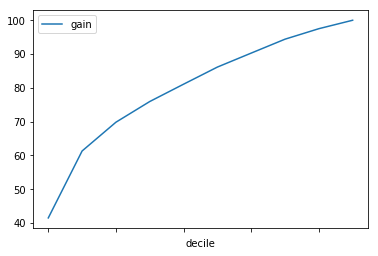

In [297]:
lift_df_final.plot.line(x='decile', y=['gain'])

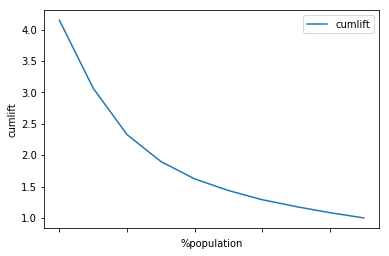

In [298]:
ax=lift_df_final.plot.line(x='decile', y=['cumlift'])
ax.set(xlabel="%population", ylabel="cumlift")
plt.show()

#### 6.Determine the cost of acquisition

Consider cost = 1*number of contacts made in the current campaign; determine the cost incurred 
for acquiring 80% of customers using the predictive model

In [299]:
cost=round(duration.sum()/60,2)
print("Total cost is :",cost)
cost_incurred=round(lift_df_final['call_cost'][0:5].sum(),2)
print("Cost incurred for acquiring 80% of customer using predictive model is :",cost_incurred)
percent_saved=round(((cost-cost_incurred)/cost)*100,2)
print("Percentage of cost of acquisition saved :",percent_saved)

Total cost is : 174562.17
Cost incurred for acquiring 80% of customer using predictive model is : 29255.22
Percentage of cost of acquisition saved : 83.24


We are able to save 83.23% of fund using the predictive model